In [1]:
!pip install folium
!pip install geopy


[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: C:\Users\ifc04\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 23.0 -> 23.0.1
[notice] To update, run: C:\Users\ifc04\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


In [2]:
import folium
import pandas as pd
from folium.plugins import MarkerCluster
from geopy.geocoders import Nominatim
#read galician_musicxml_located.csv from paretn folder
#path='../galician_musicxml_located.csv'
path='data_located.csv'
df = pd.read_csv(path,quotechar='"',skipinitialspace=True)

#df = pd.read_csv('galician_musicxml_full.csv',quotechar='"',skipinitialspace=True)

#drop first column
#name first column id
#df = df.rename(columns={'Unnamed: 0': 'id'})
#drop id
#df = df.drop(['id'], axis=1)
df

,id,name,parroquia,concellu,province,key,time_signature,ratio_negras_corcheas,muiñeira_type
0,1,Detrás das airas,NaN,As Airas,Ourense,C major,6/8,0.246575,C1
1,2,Muiñeira de Quindous,Quindous,Cervantes,Lugo,C major,6/8,0.312500,C1
2,3,Muiñeira de Quindous,Quindous,Cervantes,Lugo,C major,6/8,0.307692,C1
3,5,Muiñeira de Monforte,NaN,Monforte,Lugo,C major,6/8,0.240000,C1
4,6,Muiñeira de Ventosa,NaN,Ventosa,Pontevedra,C major,6/8,0.160000,C1
...,...,...,...,...,...,...,...,...,...
253,446,Ribeirana de Pontevedra,NaN,Pontevedra,Pontevedra,C major,6/8,0.388889,C2
254,449,Carballesa do Incio,NaN,O Incio,Lugo,C major,2/4,0.126984,C1
255,450,Muiñeira de Vilarmide,Vilarmide,A Pontenova,Lugo,C major,6/8,0.092025,C2
256,452,Danza Anterga de Lugo,NaN,Lugo,Lugo,C major,2/4,0.181818,C1


In [3]:
#print number of rows
print('Number of rows: ',len(df))
#if province, parroquia and concellu is empty, remove row
for index, row in df.iterrows():
    if pd.isnull(row['province']) and pd.isnull(row['parroquia']) and pd.isnull(row['concellu']):
        df = df.drop(index)
print('Number of rows after removing empty values: ',len(df))
#save to csv
df.to_csv('data_located.csv',index=False)

Number of rows:  258
Number of rows after removing empty values:  258


In [4]:
#use the dataframe to count the number of all muiñeiras by province and also with key not C
df.groupby(['province','key']).count()
# get only the keys



id  name  parroquia  concellu  time_signature  \
province    key                                                      
A Coruña    C major  55    55         44        52              55   
            F major   2     2          1         2               2   
            G major   1     1          1         1               1   
            a minor   4     4          4         4               4   
            c minor   3     3          2         3               3   
            d minor   1     1          0         1               1   
            e minor   1     1          1         1               1   
A Coruña    C major   1     1          1         1               1   
            a minor   1     1          1         1               1   
Asturies    C major   2     2          2         2               2   
            F major   2     2          0         2               2   
Coruña      C major   1     1          0         1               1   
León        C major   2     2          0         2               2   
Lugo        C major  75    75         43        72              75   
            F major   1     1          0         1               1   
            G major   1     1          0         1               1   
            a minor   2     2          1         2               2   
            c minor   1     1          1         1               1   
            f minor   1     1          1         1               1   
Ourense     C major  19    19         11        19              19   
            F major   2     2          1         2               2   
            G major   2     2          2         2               2   
            a minor   3     3          1         3               3   
            c minor   1     1          1         1               1   
Ourense     C major   1     1          0         1               1   
Pontevedra  C major  43    43         14        36              43   
            F major   9     9          7         8               9   
            G major   1     1          0         1               1   
            a minor   2     2          1         1               2   
            c minor   2     2          1         2               2   
            d minor   1     1          1         0               1   
Pontevedra  c minor   1     1          1         1               1   
Portugal    C major   1     1          1         1               1   

                     ratio_negras_corcheas  muiñeira_type  
province    key                                            
A Coruña    C major                     55             55  
            F major                      2              2  
            G major                      1              1  
            a minor                      4              4  
            c minor                      3              3  
            d minor                      1              1  
            e minor                      1              1  
A Coruña    C major                      1              1  
            a minor                      1              1  
Asturies    C major                      2              2  
            F major                      2              2  
Coruña      C major                      1              1  
León        C major                      2              2  
Lugo        C major                     75             74  
            F major                      1              1  
            G major                      1              1  
            a minor                      2              2  
            c minor                      1              1  
            f minor                      1              1  
Ourense     C major                     19             19  
            F major                      2              2  
            G major                      2              2  
            a minor                      3              3  
            c minor                      1              1  
Ourense   

In [5]:
import numpy as np
import matplotlib.pyplot as plt
#list of all possible keys from the df
keys = df['key'].unique()
#append province to keys as the first element
keys = np.append('province',keys)
#use this as the columns for a new dataframe
df2 = pd.DataFrame(columns=keys)
#Now we will iterate over the provinces and count the number of muiñeiras in each key
for province in df['province'].unique():
    #add this to province column
    df2 = df2.append({'province':province},ignore_index=True)
#set the province as the index
 

#list of provinces
provinces = df['province'].unique()
#C major', 'F major', 'a minor', 'c minor', 'G major', 'd minor','f minor', 'e minor'
#Remove all NaN values FROM DATAFRAME
print(list)
#get me a count of all C major muiñeiras in each province using the list and the tuples
def get_counts(province):
    C_Major_count=0
    F_Major_count=0
    a_minor_count=0
    c_minor_count=0
    G_major_count=0
    d_minor_count=0
    f_minor_count=0
    e_minor_count=0
    #iterate df and print province
    for index, row in df.iterrows():
        if row['province']==province and row['key']=='C major':
            C_Major_count+=1
        if row['province'] == province and row['key']=='F major':
            F_Major_count+=1
        if row['province'] == province and row['key']=='a minor':
            a_minor_count+=1
        if row['province'] == province and row['key']=='c minor':
            c_minor_count+=1
        if row['province'] == province and row['key']=='G major':
            G_major_count+=1
        if row['province'] == province and row['key']=='d minor':
            d_minor_count+=1
        if row['province'] == province and row['key']=='f minor':   
            f_minor_count+=1
        if row['province'] == province and row['key']=='e minor':
            e_minor_count+=1
    return C_Major_count,F_Major_count,a_minor_count,c_minor_count,G_major_count,d_minor_count,f_minor_count,e_minor_count


#Print counts
l_coruña=get_counts('A Coruña')
l_lugo=get_counts('Lugo')
l_ourense=get_counts('Ourense')
l_pontevedra=get_counts('Pontevedra')
#l1 is the first element of the previous lists


#Ourense C major column is first element of l_ourense
df2['C major'][0]=l_ourense[0]
df2['F major'][0]=l_ourense[1]
df2['a minor'][0]=l_ourense[2]
df2['c minor'][0]=l_ourense[3]
df2['G major'][0]=l_ourense[4]
df2['d minor'][0]=l_ourense[5]
df2['f minor'][0]=l_ourense[6]
df2['e minor'][0]=l_ourense[7]
#Lugo
df2['C major'][1]=l_lugo[0]
df2['F major'][1]=l_lugo[1]
df2['a minor'][1]=l_lugo[2]
df2['c minor'][1]=l_lugo[3]
df2['G major'][1]=l_lugo[4]
df2['d minor'][1]=l_lugo[5]
df2['f minor'][1]=l_lugo[6]
df2['e minor'][1]=l_lugo[7]
#Pontevedra
df2['C major'][2]=l_pontevedra[0]
df2['F major'][2]=l_pontevedra[1]
df2['a minor'][2]=l_pontevedra[2]
df2['c minor'][2]=l_pontevedra[3]
df2['G major'][2]=l_pontevedra[4]
df2['d minor'][2]=l_pontevedra[5]
df2['f minor'][2]=l_pontevedra[6]
df2['e minor'][2]=l_pontevedra[7]
#A Coruña
df2['C major'][3]=l_coruña[0]
df2['F major'][3]=l_coruña[1]
df2['a minor'][3]=l_coruña[2]
df2['c minor'][3]=l_coruña[3]
df2['G major'][3]=l_coruña[4]
df2['d minor'][3]=l_coruña[5]
df2['f minor'][3]=l_coruña[6]
df2['e minor'][3]=l_coruña[7]
#set the province as the index
#Remove rows from fourth to last
df2 = df2.drop(df2.index[4:8])
#Now I want to use this counts as %
#First I need to get the total number of muiñeiras in each province
#I will use the same function as before but this time I will count the number of muiñeiras in each province
def get_total(province):
    total=0
    for index, row in df.iterrows():
        if row['province']==province:
            total+=1
    return total
df2


<class 'list'>


C:\Users\ifc04\AppData\Local\Temp\ipykernel_26296\3668750878.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'province':province},ignore_index=True)
C:\Users\ifc04\AppData\Local\Temp\ipykernel_26296\3668750878.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'province':province},ignore_index=True)
C:\Users\ifc04\AppData\Local\Temp\ipykernel_26296\3668750878.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.append({'province':province},ignore_index=True)
C:\Users\ifc04\AppData\Local\Temp\ipykernel_26296\3668750878.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df2 = df2.appe

,province,C major,F major,a minor,c minor,G major,d minor,f minor,e minor
0,Ourense,19,2,3,1,2,0,0,0
1,Lugo,75,1,2,1,1,0,1,0
2,Pontevedra,43,9,2,2,1,1,0,0
3,A Coruña,55,2,4,3,1,1,0,1
8,Coruña,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Asturies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Pontevedra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df2


,province,C major,F major,a minor,c minor,G major,d minor,f minor,e minor
0,Ourense,19,2,3,1,2,0,0,0
1,Lugo,75,1,2,1,1,0,1,0
2,Pontevedra,43,9,2,2,1,1,0,0
3,A Coruña,55,2,4,3,1,1,0,1
8,Coruña,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Asturies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Pontevedra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


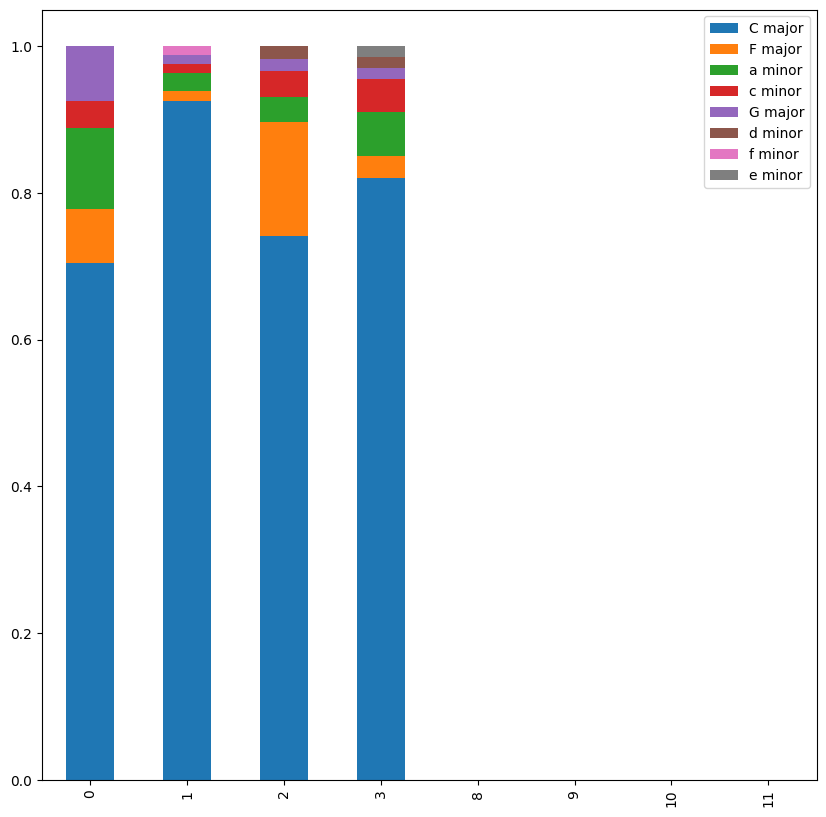

,province,C major,F major,a minor,c minor,G major,d minor,f minor,e minor
0,Ourense,70.37037,7.407407,11.111111,3.703704,7.407407,0.0,0.0,0.0
1,Lugo,92.592593,1.234568,2.469136,1.234568,1.234568,0.0,1.234568,0.0
2,Pontevedra,74.137931,15.517241,3.448276,3.448276,1.724138,1.724138,0.0,0.0
3,A Coruña,82.089552,2.985075,5.970149,4.477612,1.492537,1.492537,0.0,1.492537
8,Coruña,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,Asturies,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10,Pontevedra,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,Portugal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
#Now I will get the total number of muiñeiras in each province
total_ourense=get_total('Ourense')
total_lugo=get_total('Lugo')
total_pontevedra=get_total('Pontevedra')
total_coruña=get_total('A Coruña')
#Now I will get the percentage of each key in each province
#Ourense
df2['C major'][0]=df2['C major'][0]/total_ourense
df2['F major'][0]=df2['F major'][0]/total_ourense
df2['a minor'][0]=df2['a minor'][0]/total_ourense
df2['c minor'][0]=df2['c minor'][0]/total_ourense
df2['G major'][0]=df2['G major'][0]/total_ourense
df2['d minor'][0]=df2['d minor'][0]/total_ourense
df2['f minor'][0]=df2['f minor'][0]/total_ourense
df2['e minor'][0]=df2['e minor'][0]/total_ourense
#Lugo
df2['C major'][1]=df2['C major'][1]/total_lugo
df2['F major'][1]=df2['F major'][1]/total_lugo
df2['a minor'][1]=df2['a minor'][1]/total_lugo
df2['c minor'][1]=df2['c minor'][1]/total_lugo
df2['G major'][1]=df2['G major'][1]/total_lugo
df2['d minor'][1]=df2['d minor'][1]/total_lugo
df2['f minor'][1]=df2['f minor'][1]/total_lugo
df2['e minor'][1]=df2['e minor'][1]/total_lugo
#Pontevedra
df2['C major'][2]=df2['C major'][2]/total_pontevedra
df2['F major'][2]=df2['F major'][2]/total_pontevedra
df2['a minor'][2]=df2['a minor'][2]/total_pontevedra
df2['c minor'][2]=df2['c minor'][2]/total_pontevedra
df2['G major'][2]=df2['G major'][2]/total_pontevedra
df2['d minor'][2]=df2['d minor'][2]/total_pontevedra
df2['f minor'][2]=df2['f minor'][2]/total_pontevedra
df2['e minor'][2]=df2['e minor'][2]/total_pontevedra
#A Coruña
df2['C major'][3]=df2['C major'][3]/total_coruña
df2['F major'][3]=df2['F major'][3]/total_coruña
df2['a minor'][3]=df2['a minor'][3]/total_coruña
df2['c minor'][3]=df2['c minor'][3]/total_coruña
df2['G major'][3]=df2['G major'][3]/total_coruña
df2['d minor'][3]=df2['d minor'][3]/total_coruña
df2['f minor'][3]=df2['f minor'][3]/total_coruña
df2['e minor'][3]=df2['e minor'][3]/total_coruña
#Now I will plot the data
df2.plot(kind='bar', stacked=True, figsize=(10,10))
plt.show()
#also multiply by 100 to get the percentage except for the province column
df2['C major']=df2['C major']*100
df2['F major']=df2['F major']*100
df2['a minor']=df2['a minor']*100
df2['c minor']=df2['c minor']*100
df2['G major']=df2['G major']*100
df2['d minor']=df2['d minor']*100
df2['f minor']=df2['f minor']*100
df2['e minor']=df2['e minor']*100

#ROUND ALL THE VALUES TO 2 DECIMALS



df2
df2

In [8]:
#Coordenadas
#"Lugo, A Fonsagrada"
def get_coordinates(place):
    geolocator = Nominatim(user_agent="galician_music")
    location = geolocator.geocode(place)
    if location is None:
        return 0, 0
    return location.latitude, location.longitude

print(get_coordinates("Laxe, A Coruña"))

(43.2218866, -9.0059491)


In [9]:
#Iterate through dataframe and print concellu, provincia and parroquias
#import sleep
from time import sleep
for index, row in df.iterrows():
    concellu=row['concellu']
    parroquia=row['parroquia']
    provincia=row['province']
    #Concat strings
    place = str(parroquia) + ", " +str(concellu) + ", " + str(provincia)
    #if any value is NaN or nan strip and keep only the right part
    if pd.isnull(parroquia):
        place = str(concellu) + ", " + str(provincia)
    if pd.isnull(concellu):
        place = provincia
    #if it has nan or Null in province, keep parroquia and concellu
    if pd.isnull(provincia):
        place = str(parroquia) + ", " +str(concellu)
    #if all is nan skip
    if pd.isnull(parroquia) and pd.isnull(concellu) and pd.isnull(provincia):
        continue
    #if place contains nan add
    if not "nan" in place:
        df.loc[index,'location'] = place
    
#drop parroquia
df = df.drop(columns=['parroquia'])
#drop concellu
df = df.drop(columns=['concellu'])
#drop province
df = df.drop(columns=['province'])

    
df
#Print location
#drop nan values
df = df.dropna(subset=['location'])
#Iterate through dataframe and get coordinates
for index, row in df.iterrows():
    
    #coordinates
    lat, lon = get_coordinates(row['location'])
    if lat == 0 and lon == 0:
        print("oops nun lo encontré", row['location'])
        #try getting locatios without parroquia, split string and get middle and last part
        place = row['location'].split(", ")
        place=place[1]+", "+place[2]
        lat, lon = get_coordinates(place)
        print("trying again", lat , lon)
        
        if lat == 0 and lon == 0:
            sleep(1)
            print(place,"still not working")
            place=place.split(", ")
            place=place[1]
            lat, lon = get_coordinates(place)
            print("trying for the last time", lat , lon)
    #add coordinates to dataframe
    df.loc[index,'lat'] = lat
    df.loc[index,'lon'] = lon
    


    




    

oops nun lo encontré Montrove, Cambre, A Coruña
trying again 43.2803751 -8.3297129
oops nun lo encontré Sendelle, Biomorto, A Coruña
trying again 0 0
Biomorto, A Coruña still not working
trying for the last time 43.3709703 -8.3959425
oops nun lo encontré Borreiro, Abegondo, A Coruña
trying again 43.2104427 -8.2903237
oops nun lo encontré Borreiro, Abegondo, A Coruña
trying again 43.2104427 -8.2903237
oops nun lo encontré Lema, Baldaio, A Coruña
trying again 43.1450259 -8.5763411
oops nun lo encontré Grixalba, Sobrado dos Monxes, A Coruña
trying again 43.0404996 -8.02238
oops nun lo encontré Pobra de Burón, A Fonsagrada, Lugo
trying again 43.1248311 -7.0676605
oops nun lo encontré Pacios de Mourisco, A Fonsagrada, Lugo
trying again 43.1248311 -7.0676605
oops nun lo encontré Santo Estevo de Piadela, Betanzos, A Coruña
trying again 43.2729197 -8.2218227
oops nun lo encontré Santiso, Vila de Cruces, Pontevedra
trying again 42.7937228 -8.1699391
oops nun lo encontré Entreambasaugas, Guntín 

In [24]:
df
#save to csv
df.to_csv('data_located.csv', index=False)

In [11]:


# Create a map object centered on Galicia
m = folium.Map(location=[42.7, -8.5], zoom_start=8)

#Iterate through dataframe and print concellu, provincia and parroquias
for index, row in df.iterrows():
    place = row['location']
    #Get coordinates from dataframe
    lat = row['lat']
    lon = row['lon']
    #Add marker to mapm if row
    folium.Marker([lat, lon], popup=row['name']).add_to(m)
    #Add red marker


# Display the map
m


In [12]:
# MAPA CON LAS MUIÑEIRAS CON UN RITMO DIFERENTE A 6/8
m = folium.Map(location=[42.7, -8.5], zoom_start=8)

#Iterate through dataframe and print concellu, provincia and parroquias
for index, row in df.iterrows():
    place = row['location']
    #Get coordinates from dataframe
    lat = row['lat']
    lon = row['lon']
    #Add marker to mapm if row time signature is 6/8 make it red
    if not row['time_signature'] == '6/8':
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='red')).add_to(m)
    
    #Add red marker


# Display the map
m


In [13]:
# Create a map object centered on Galicia
m = folium.Map(location=[42.7, -8.5], zoom_start=8)

#Iterate through dataframe and print concellu, provincia and parroquias
for index, row in df.iterrows():
    place = row['location']
    #Get coordinates from dataframe
    lat = row['lat']
    lon = row['lon']
    #Depending on how close the ratio_corcheas_negras is between 0.005 and 0.15 make it light green
    if row['ratio_negras_corcheas'] >= 0.000 and row['ratio_negras_corcheas'] < 0.1265:
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='green')).add_to(m)
    #If it is between 0.15 and 0.3 make it green
    if row['ratio_negras_corcheas'] > 0.1265 and row['ratio_negras_corcheas'] < 0.3:
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='darkgreen')).add_to(m)

    if row['ratio_negras_corcheas'] >= 0.3 and row['ratio_negras_corcheas'] < 0.55:
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='purple')).add_to(m)
    if row['ratio_negras_corcheas'] >= 0.55:
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='orange')).add_to(m)
    
    
    #Add red marker


# Display the map
m

In [14]:
#tabla
# columnas provincia y range 1 2 3 4
#iterar dataframe y si provincia es igual a la provincia de la columna sumar 1 al valor de la columna 
 



(array([167.,  68.,  11.,   4.,   1.,   1.,   1.,   1.,   1.,   1.]),
 array([0.        , 0.21363636, 0.42727273, 0.64090909, 0.85454545,
        1.06818182, 1.28181818, 1.49545455, 1.70909091, 1.92272727,
        2.13636364]),
 <BarContainer object of 10 artists>)

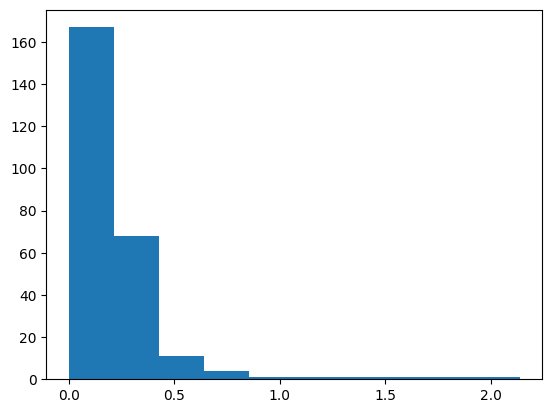

In [15]:
#Iterate through dataframe and print all the ratio_negras_corcheas
#import plot thingy
import matplotlib.pyplot as plt 
list=[]
for index, row in df.iterrows():
    #print(row['ratio_negras_corcheas'])
    list.append(row['ratio_negras_corcheas'])

    #make me a histogram of the ratio_negras_corcheas
plt.hist(list, bins=10)
#show all values between 0 and 0.5 more detailed



0.1265


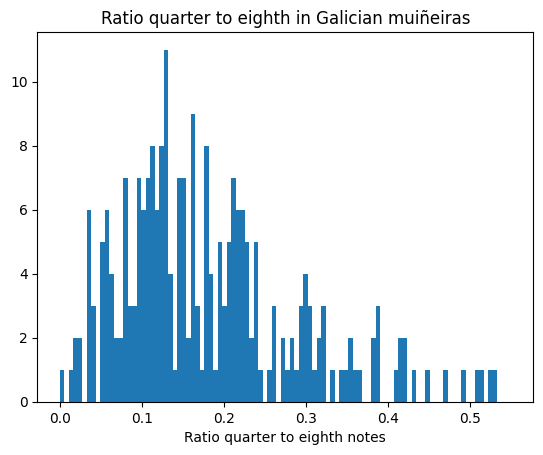

In [16]:
import numpy as np
h=plt.hist(list, bins=100, range=(0, 0.55))
#get x from histogram
x=h[1]
#get index where y is maximum
index = np.argmax(h[0])
#get x in that index
print(x[index])
# add axis names tho
plt.xlabel('Ratio quarter to eighth notes')
#add title
plt.title('Ratio quarter to eighth in Galician muiñeiras')
plt.show()

In [17]:
#get row where ratio_negras_corcheas is more than 0.12 and less than 0.13, also get the second one that
#it founds

df[(df['ratio_negras_corcheas'] > 0.12) & (df['ratio_negras_corcheas'] < 0.13)]
#print name
print(df.loc[0,'name'])

#and now one that has more than 0.15 and less than 0.20
df[(df['ratio_negras_corcheas'] > 0.15) & (df['ratio_negras_corcheas'] < 0.20)]
#print name
print(df.loc[1,'name'])

Detrás das airas
Muiñeira de Quindous


In [18]:
# Create a map object centered on Galicia
m = folium.Map(location=[42.7, -8.5], zoom_start=8)

#Iterate through dataframe and print concellu, provincia and parroquias
for index, row in df.iterrows():
    place = row['location']
    #Get coordinates from dataframe
    lat = row['lat']
    lon = row['lon']
    #If muiñeira type is 'C1' make it green
    if row['muiñeira_type'] == 'C1':
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='green')).add_to(m)
    #If it is 'C2' make it red
    if row['muiñeira_type'] == 'C2':
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='red')).add_to(m)
     #C1 ==========> P1==P2; R1!=R2
     #C2 ==========> P1!=P2; R1!=R2
    
    #Add red marker


# Display the map
m

Mapa con marcadores segun la key de la muiñeira

In [19]:
#print the different types of keys in the dataframe
df['key'].unique()


array(['C major', 'F major', 'a minor', 'c minor', 'G major', 'd minor',
       'f minor', 'e minor'], dtype=object)

In [20]:
# Create a map object centered on Galicia
m = folium.Map(location=[42.7, -8.5], zoom_start=8)

#Iterate through dataframe and print concellu, provincia and parroquias
for index, row in df.iterrows():
    place = row['location']
    #Get coordinates from dataframe
    lat = row['lat']
    lon = row['lon']
    #If it is 'C minor' make it light green
    if row['key'] == 'c minor':
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='lightgreen')).add_to(m)
    #If it is 'G major' make it red
    if row['key'] == 'G major':
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='red')).add_to(m)
    # if it is F major make it orange
    if row['key'] == 'F major':
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='darkpurple')).add_to(m)
    #if it is a minor
    if row['key'] == 'a minor':
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='orange')).add_to(m)
    #if it is d minor
    if row['key'] == 'd minor':
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='blue')).add_to(m)
    #if it is e minor
    if row['key'] == 'e minor':
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='gray')).add_to(m)
    #if it is f minor
    if row['key'] == 'f minor':
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='purple')).add_to(m)
    #plot c major
    #if row['key'] == 'C major':
    #    folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='green')).add_to(m)



# Display the map
m

In [21]:
#Create class with 4 attributes, each being a tuple of latitud and longitud

class Area:
    def __init__(self, coord1, coord2, coord3, coord4):
        self.coord1 = coord1
        self.coord2 = coord2
        self.coord3 = coord3
        self.coord4 = coord4

#Lets try an example of Area
#Create a list of coordinates
coords = [(43.39308269143007, -9.223499498685172), 
          (43.360171263809086, -8.5935855182987), 
          (42.86272813565901, -9.38640250697399), 
          (42.894795889942, -8.547131493070601)]

#Now function that receives coords and itereates through the dataframe, returning a new dataframe
#with the muiñeiras that are inside the area
def get_muiñeiras_in_area(coords):
    #Create empty dataframe
    df_muiñeiras_in_area = pd.DataFrame(columns=['name', 'location', 'lat', 'lon', 'key', 'muiñeira_type', 'ratio_negras_corcheas'])
    #Iterate through dataframe
    for index, row in df.iterrows():
        #Get coordinates from dataframe
        lat = row['lat']
        lon = row['lon']
        #Check if coordinates are inside the area
        if coords[0][0] > lat > coords[2][0] and coords[0][1] < lon < coords[1][1]:
            #If they are, append the row to the new dataframe
            df_muiñeiras_in_area = df_muiñeiras_in_area.append(row, ignore_index=True)
    return df_muiñeiras_in_area


rias_altas_test=get_muiñeiras_in_area(coords)



C:\Users\ifc04\AppData\Local\Temp\ipykernel_26296\256285061.py:30: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_muiñeiras_in_area = df_muiñeiras_in_area.append(row, ignore_index=True)


In [22]:
# Create a map object centered on Galicia
m = folium.Map(location=[42.7, -8.5], zoom_start=8)

#Iterate through dataframe and print concellu, provincia and parroquias
for index, row in rias_altas_test.iterrows():
    place = row['location']
    #Get coordinates from dataframe
    lat = row['lat']
    lon = row['lon']
    #If muiñeira type is 'C1' make it green
    if row['muiñeira_type'] == 'C1':
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='green')).add_to(m)
    #If it is 'C2' make it red
    if row['muiñeira_type'] == 'C2':
        folium.Marker([lat, lon], popup=row['name'], icon=folium.Icon(color='red')).add_to(m)
    
    
    #Add red marker


# Display the map
m